# <p style="text-align: center;">Clusterização e Algoritmo K-means</p> 

Organizar dados em agrupamentos é um dos modos fundamentais de compreensão e aprendizado. Como por exemplo, os organismos em um sistema biológico são classificados em domínio, reino, filo, classe, etc. A análise de agrupamento é o estudo formal de métodos e algoritmos para agrupar objetos de acordo com medidas ou características semelhantes. A análise de cluster, em sua essência, não utiliza rótulos de categoria que marcam objetos com identificadores anteriores, ou seja, rótulos de classe. A ausência de informação de categoria distingue o agrupamento de dados (aprendizagem não supervisionada) da classificação ou análise discriminante (aprendizagem supervisionada). O objetivo da clusterização é encontrar estruturas em dados e, portanto, é de natureza exploratória. 

A técnica de Clustering tem uma longa e rica história em uma variedade de campos científicos. Um dos algoritmos de clusterização mais populares e simples, o K-means, foi publicado pela primeira vez em 1955. Apesar do K-means ter sido proposto há mais de 50 anos e milhares de algoritmos de clustering terem sido publicados desde então, o K-means é ainda amplamente utilizado.

Fonte: Anil K. Jain, Data clustering: 50 years beyond K-means, Pattern Recognition Letters, Volume 31, Issue 8, 2010

## Equipe
### Ícaro de Lima - 385194 <br> Thalisson Felipe - 390195
<hr>

# Objetivo

- Implementar as funções do algoritmo KMeans passo-a-passo
- Comparar a implementação com o algoritmo do Scikit-Learn
- Entender e codificar o Método do Cotovelo
- Utilizar o K-means em um dataset real 

# Carregando os dados de teste

Carregue os dados disponibilizados, e identifique visualmente em quantos grupos os dados parecem estar distribuídos.

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, preprocessing

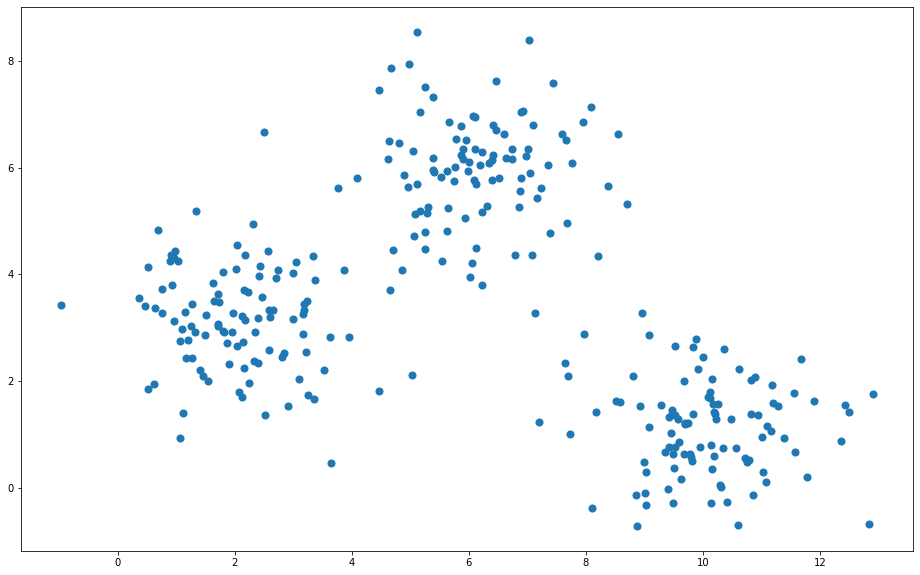

In [2]:
# load the data with pandas
dataset = pd.read_csv('datasets/dataset.csv', header=None)
dataset = np.array(dataset)

fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], s=50)
plt.show()

Pelo scatter plot, já é possível ver três massas de dados principais.

# 1. Implementar o algoritmo K-means

Nesta etapa você irá implementar as funções que compõe o algoritmo do KMeans uma a uma. É importante entender e ler a documentação de cada função, principalmente as dimensões dos dados esperados na saída.

## 1.1 Inicializar os centróides

A primeira etapa do algoritmo consiste em inicializar os centróides de maneira aleatória. Essa etapa é uma das mais importantes do algoritmo e uma boa inicialização pode diminuir bastante o tempo de convergência.

Para inicializar os centróides você pode considerar o conhecimento prévio sobre os dados, mesmo sem saber a quantidade de grupos ou sua distribuição. 

> Dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html 

In [3]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centróides calculados - [k,n]
    """

    centroids = [dataset[random.randint(0, dataset.shape[0] - 1)] for _ in range(k)]
    
    return np.array(centroids)

Teste a função criada e visualize os centróides que foram calculados.

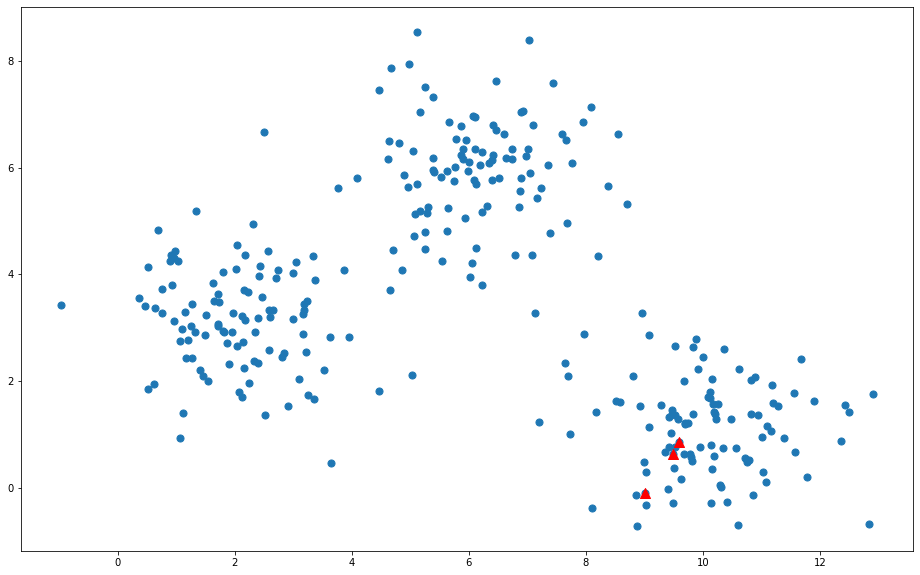

In [4]:
k = 3
centroids = calculate_initial_centers(dataset, k)

fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

## 1.2 Definir os clusters

Na segunda etapa do algoritmo serão definidos o grupo de cada dado, de acordo com os centróides calculados.

### 1.2.1 Função de distância 

Codifique a função de distância euclidiana entre dois pontos __(a, b)__.

Definido pela equação:

$$ dist(a, b) = \sqrt{(a_1-b_1)^{2}+(a_2-b_2)^{2}+ ... + (a_n-b_n)^{2}} $$

$$ dist(a, b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^{2}} $$

In [5]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]
    
    Retornos:
    distance -- Distância euclidiana entre os pontos
    """

    distance = 0
    for ai, bi in zip(a, b):
        distance += (ai - bi) ** 2

    return np.sqrt(distance)

Teste a função criada.

In [6]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (euclidean_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


### 1.2.2 Calcular o centroide mais próximo

Utilizando a função de distância codificada anteriormente, complete a função abaixo para calcular o centroid mais próximo de um ponto qualquer. 

> Dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

In [7]:
def nearest_centroid(a, centroids):
    """
    Calcula o índice do centroid mais próximo ao ponto a
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_index -- Índice do centróide mais próximo
    """
    
    dists = [euclidean_distance(a, centroid) for centroid in centroids]
    nearest_index = np.argmin(dists)
    
    return nearest_index

Teste a função criada

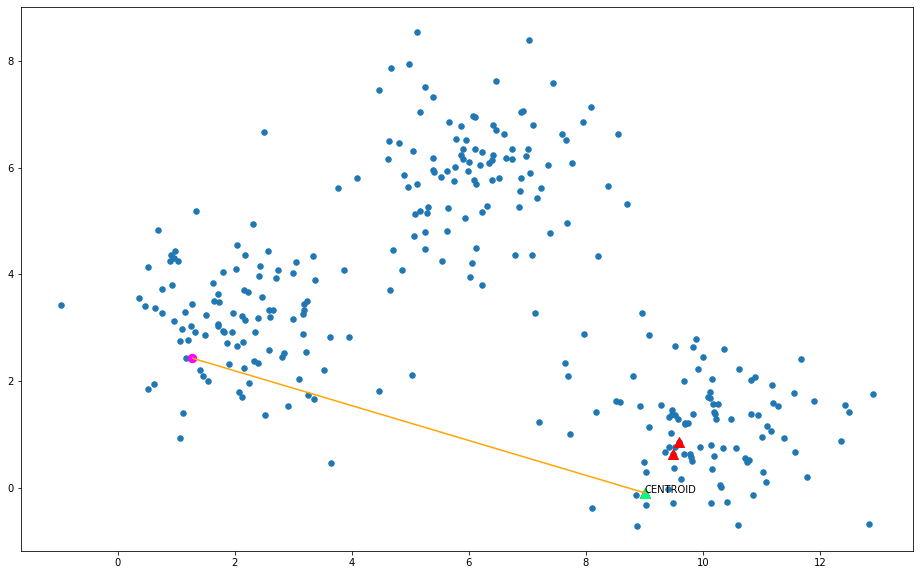

In [8]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index,:]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], s=30)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c='magenta', s=70)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],
            marker='^', c='springgreen', s=100)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot([a[0], centroids[idx_nearest_centroid,0]], 
         [a[1], centroids[idx_nearest_centroid,1]],c='orange')
plt.annotate('CENTROID', (centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],))
plt.show()

### 1.2.3 Calcular centroid mais próximo de cada dado do dataset

Utilizando a função anterior que retorna o índice do centroid mais próximo, calcule o centroid mais próximo de cada dado do dataset. 

In [9]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o índice do centroid mais próximo para cada 
    ponto do dataset
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    """

    nearest_indexes = [nearest_centroid(point, centroids) for point in dataset]

    return nearest_indexes

Teste a função criada visualizando os cluster formados.

In [10]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

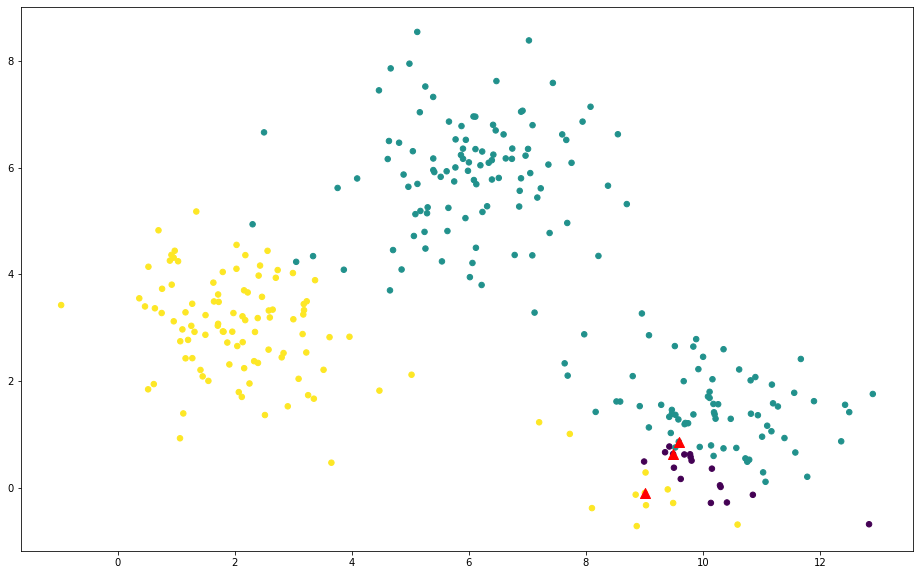

In [11]:
fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes, s=30)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

## 1.3 Métrica de avaliação 

Após formar os clusters, como sabemos se o resultado gerado é bom? Para isso, precisamos definir uma métrica de avaliação.

O algoritmo K-means tem como objetivo escolher centróides que minimizem a soma quadrática das distância entre os dados de um cluster e seu centróide. Essa métrica é conhecida como __inertia__.

$$\sum_{i=0}^{n}\min_{c_j \in C}(||x_i - c_j||^2)$$

A __inertia__, ou o critério de soma dos quadrados dentro do cluster, pode ser reconhecido como uma medida de o quão internamente coerentes são os clusters, porém ela sofre de alguns inconvenientes:

- A inertia pressupõe que os clusters são convexos e isotrópicos, o que nem sempre é o caso. Desta forma, pode não representar bem em aglomerados alongados ou variedades com formas irregulares.
- A inertia não é uma métrica normalizada: sabemos apenas que valores mais baixos são melhores e zero é o valor ótimo. Mas em espaços de dimensões muito altas, as distâncias euclidianas tendem a se tornar infladas (este é um exemplo da chamada “maldição da dimensionalidade”). A execução de um algoritmo de redução de dimensionalidade, como o PCA, pode aliviar esse problema e acelerar os cálculos.

Fonte: https://scikit-learn.org/stable/modules/clustering.html

Para podermos avaliar os nosso clusters, codifique a métrica da inertia abaixo, para isso você pode utilizar a função de distância euclidiana construída anteriormente.

$$inertia = \sum_{i=0}^{n}\min_{c_j \in C} (dist(x_i, c_j))^2$$

In [12]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o 
    centro do cluster mais próximo.
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    inertia -- Soma total do quadrado da distância entre 
    os dados de um cluster e seu centróide
    """
    
    inertia = 0
    for point in dataset:
        dists = [euclidean_distance(centroid, point) ** 2 for centroid in centroids]
        inertia += dists[np.argmin(dists, axis=0)]
    
    return inertia

Teste a função codificada executando o código abaixo.

In [13]:
tmp_data = np.array([[1,2,3],[3,6,5],[4,5,6]])
tmp_centroide = np.array([[2,3,4]])

tmp_nearest_indexes = all_nearest_centroids(tmp_data, tmp_centroide)
if inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")

Inertia calculada corretamente!


In [14]:
# Use a função para verificar a inertia dos seus clusters
inertia(dataset, centroids, nearest_indexes)

10251.864835086682

## 1.4 Atualizar os clusters

Nessa etapa, os centróides são recomputados. O novo valor de cada centróide será a media de todos os dados atribuídos ao cluster.

In [15]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    centroids -- Lista com centróides atualizados - [k,n]
    """
    
    clusters = np.mat(np.zeros((dataset.shape[0], 2)))
    for i, point in enumerate(dataset):
        dists = [euclidean_distance(centroid, point) ** 2 for centroid in centroids]
        clusters[i,:] = np.argmin(dists), dists[np.argmin(dists)] ** 2
    
    for i in range(centroids.shape[0]):
        points = dataset[np.nonzero(clusters[:,0].A == i)[0]]
        if len(points) == 0: # empty cluster
            rand = random.randint(0, dataset.shape[0] - 1)
            centroids[i,:] = dataset[rand]
        else:
            centroids[i,:] = np.mean(points, axis=0)

    return centroids

Na função acima checamos se algum centroid não possui nenhum valor associado a ele, se for esse caso não é possível calcular a média dos pontos e atualizar o centroide. Isso pode acontecer porque a escolha dos centroides não foi boa ou porque o número de cluster é maior que o número de pontos, esse último não é o caso. Então pesquisando um pouco achamos duas possíveis soluções: atualizar o centroid com um ponto aleatório do dataset ou deixar o centroid como a média dos pontos da iteração anterior. Escolhemos a primeira opção.

Visualize os clusters formados

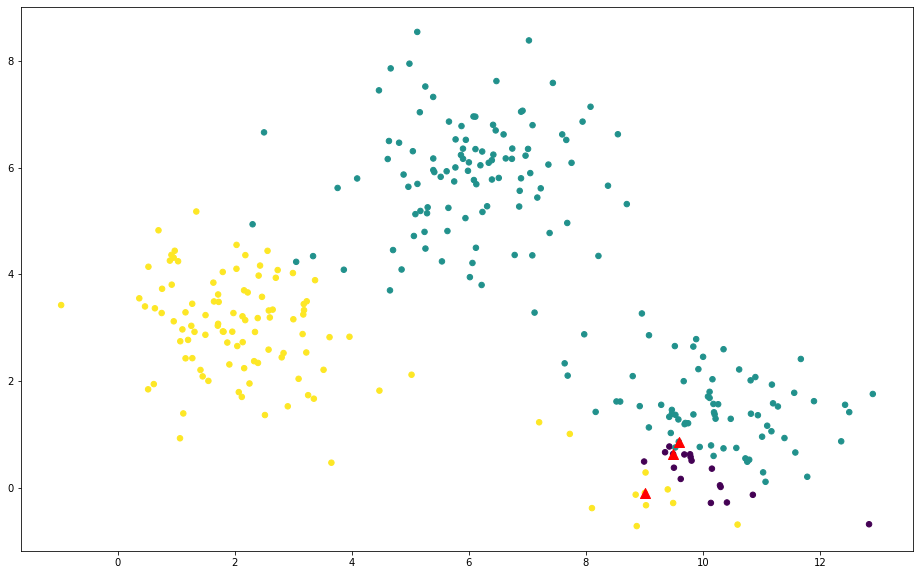

In [16]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes, s=30)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()

Execute a função de atualização e visualize novamente os cluster formados

In [17]:
centroids = update_centroids(dataset, centroids, nearest_indexes)

Quanto mais repetimos a função de atualizar os centroides, podemos ver pelo gráfico de distribuição que os centroides vão ficando cada vez mais próximos do centro dos dados de cada uma das três massas principais.

# 2. K-means

## 2.1 Algoritmo completo

Utilizando as funções codificadas anteriormente, complete a classe do algoritmo K-means!

In [18]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):

        # Inicializa os centróides
        self.cluster_centers_ = calculate_initial_centers(X, self.n_clusters)
        
        # Computa o cluster de cada amostra
        self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
        
        # Calcula a inércia inicial
        old_inertia = inertia(X, self.cluster_centers_, self.labels_)
        
        for index in range(self.max_iter):
            self.cluster_centers_ = update_centroids(X, self.cluster_centers_, self.labels_)
            self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)

            if self.inertia_ == old_inertia:
                break
            else:
                old_inertia = self.inertia_

        return self

    def predict(self, X):
        labels = all_nearest_centroids(X, self.cluster_centers_)        
        return labels

Baseado na observação da seção anterior, o algoritmo iterativamente atualiza os centroides até que a inercia não sofra mais alterações (ou seja, quando houve a convergência do algoritmo) ou até o número máximo de iterações ser atingido (o default é 300 iterações).

Verifique o resultado do algoritmo abaixo!

Inércia =  608.6035508327781


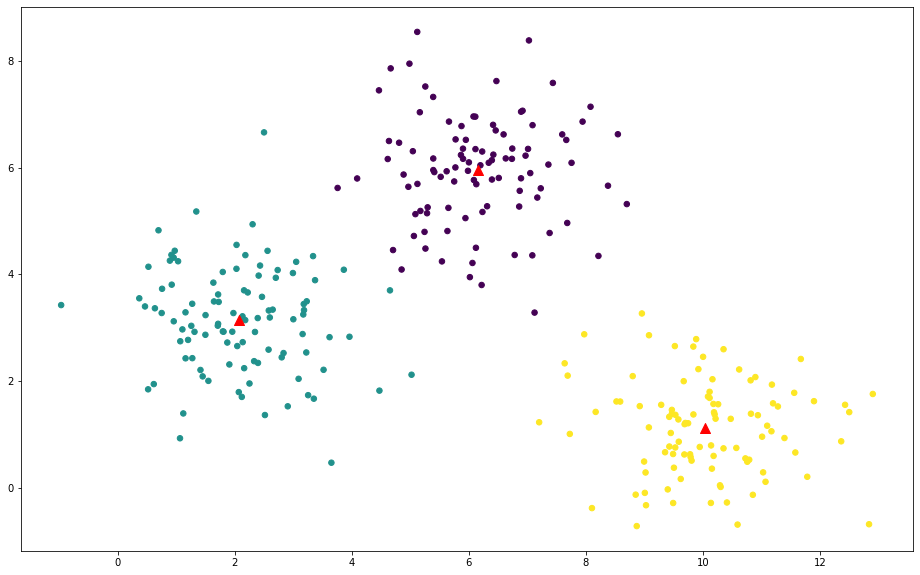

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inércia = ", kmeans.inertia_)

fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_, s=30)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Utilizando nosso algoritmo KMeans, temos uma inércia de 608.6. Observando o gráfico, vemos que os dados são divididos em três clusters principais, com os centroides bem no meio de cada massa de dados.

## 2.2 Comparar com algoritmo do Scikit-Learn

Use a implementação do algoritmo do scikit-learn do K-means para o mesmo conjunto de dados. Mostre o valor da inércia  e os conjuntos gerados pelo modelo. Você pode usar a mesma estrutura da célula de código anterior.
> Dica: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans

Inércia Scikit =  608.6035508327781


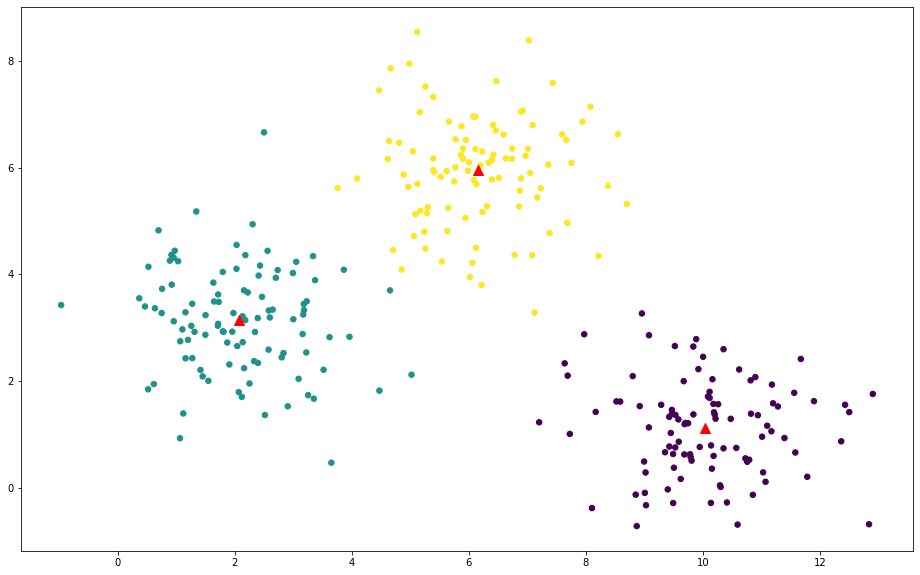

In [20]:
#### CODE HERE ####
from sklearn.cluster import KMeans as KMeans_sk
kmeans_sk = KMeans_sk(n_clusters=3, random_state=0).fit(dataset)

print("Inércia Scikit = ", kmeans_sk.inertia_)
fig = plt.figure(figsize=(16, 10))
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans_sk.labels_, s=30)
plt.scatter(kmeans_sk.cluster_centers_[:,0], 
            kmeans_sk.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Comparando com o método do scikit learn, de cara observamos que foi obtido a mesma inércia nos dois casos. Além disso, analisando o gráfico de disperção, vemos que tanto os centróides, quanto a distribuição dos dados em cada cluster é igual (com exceção das cores de cada cluster - o primeiro e o segundo estão com as cores trocadas - mas isso não é nada demais, apenas uma estilização diferente).

# 3. Método do cotovelo

Implemete o método do cotovelo e mostre o melhor K para o conjunto de dados.

In [21]:
def elbow_method(dataset, k=10):
    return [KMeans(n_clusters=i+1).fit(dataset).inertia_ for i in range(k)]

In [22]:
k = 10
inertias = elbow_method(dataset, k)

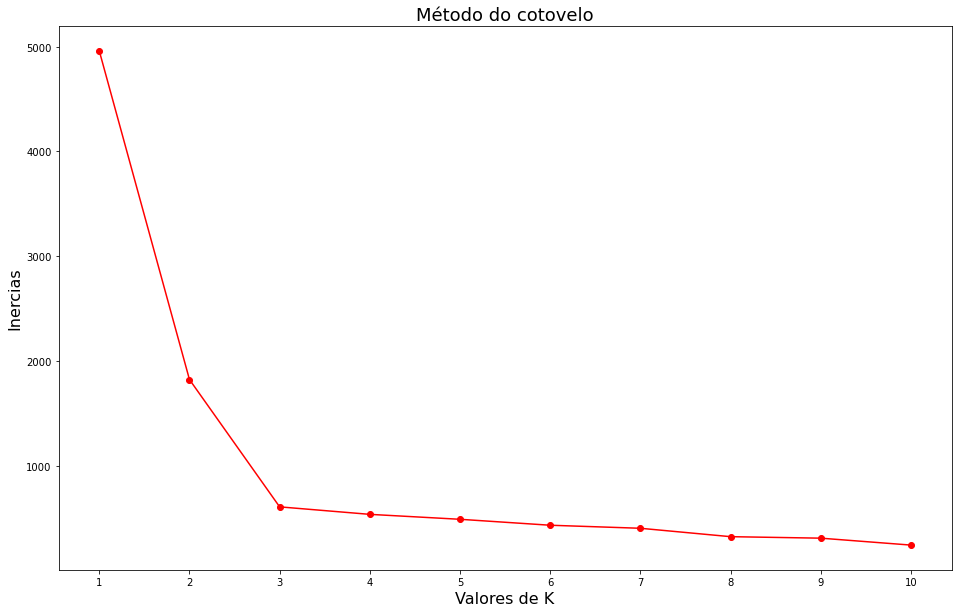

In [23]:
fig = plt.figure(figsize=(16, 10))
plt.plot(np.arange(1, k+1), inertias, 'ro-') 
plt.xlabel('Valores de K', fontsize=16)
plt.ylabel('Inercias', fontsize=16) 
plt.title('Método do cotovelo', fontsize=18) 
plt.xticks(np.arange(1, k+1))
plt.show() 

Analisando o plot do nosso método do cotovelo para nosso dataset inicial, vemos uma inércia muito grande quando o valor de K escolhido é 1 (um). Essa inércia cai consideravelmente quando o K chega a 3 (três), apresentando uma inércia mais de 5 vezes menor. A partir de então, com K > 3, temos uma queda gradativamente pequena até chegar a 10 (ponto limite escolhido por nós) mas que não representa uma diferença muito considerável, como é possível ver no gráfico.
Temos uma inclinação da reta de K = 1 até K = 3 muito grande, já para K > 3 essa inclinação se torna muito baixa, quase próxima de uma reta. Isto significa que temos que analisar o tradeoff entre o número de clusters e a inércia, dependendo dos nossos dados e o que precisamos extrair deles. Como visto nos outros scatter plots, identificamos de cara 3 massas principais de dados. Sendo assim, escolher um K maior que 3 (três), por mais que diminua um pouco a inércia do modelo, não parece ser o melhor para nosso conjunto de dados.

# 4. Dataset Real

Exercícios

1 - Aplique o algoritmo do K-means desenvolvido por você no datatse iris [1]. Mostre os resultados obtidos utilizando pelo menos duas métricas de avaliação de clusteres [2].

- [1] http://archive.ics.uci.edu/ml/datasets/iris
- [2] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

> Dica: você pode utilizar as métricas completeness e homogeneity.

2 - Tente melhorar o resultado obtido na questão anterior utilizando uma técnica de mineração de dados. Explique a diferença obtida. 

> Dica: você pode tentar normalizar os dados [3].
> - [3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html


3 - Qual o número de clusteres (K) você escolheu na questão anterior? Desenvolva o Método do Cotovelo sem usar biblioteca e descubra o valor de K mais adequado. Após descobrir, utilize o valor obtido no algoritmo do K-means.

4 - Utilizando os resultados da questão anterior, refaça o cálculo das métricas e comente os resultados obtidos. Houve uma melhoria? Explique.

## 4.1 KMeans no dataset iris.

Definimos algumas funções auxiliares para nos ajudar a plotar os gráficos.

In [24]:
# Se kmeans != None, é plotado o dataset com seus centroides e labels
# se kmeans == None, é plotado somente os pontos do dataset
def plot_dataset(dataset, kmeans=None, target=None, legend=True, title='Sepal Length x Sepal Width', xlabel='Sepal Length', ylabel='Sepal Width'):
    fig = plt.figure(figsize=(16, 10))
    if kmeans:
        if legend:
            plt.scatter(dataset[target == 0, 0], dataset[target == 0, 1], s=30, c='red', label='Iris-setosa')
            plt.scatter(dataset[target == 1, 0], dataset[target == 1, 1], s=30, c='blue', label='Iris-versicolour')
            plt.scatter(dataset[target == 2, 0], dataset[target == 2, 1], s=30, c='green', label='Iris-virginica')
            plt.legend()
        else:
            plt.scatter(dataset[:,0], dataset[:,1], s=30, c=kmeans.labels_)
        plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='magenta', s=100, label='Centroides')
    else:
        plt.scatter(dataset[target == 0, 0], dataset[target == 0, 1], s=50, c='red', label='Iris-setosa')
        plt.scatter(dataset[target == 1, 0], dataset[target == 1, 1], s=50, c='blue', label='Iris-versicolour')
        plt.scatter(dataset[target == 2, 0], dataset[target == 2, 1], s=50, c='green', label='Iris-virginica')
        plt.legend()

    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

# Retorna as métricas homogeneidade e completude
def compute_metrics(y_true, y_pred):
    homogeneity = metrics.homogeneity_score(y_true, y_pred)
    completeness = metrics.completeness_score(y_true, y_pred)
    
    return homogeneity, completeness

# Plota o resultado do método do cotovelo
def elbow_method_plot(inertias):
    fig = plt.figure(figsize=(16, 10))
    plt.plot(np.arange(1, len(inertias)+1), inertias, 'ro-') 
    plt.xlabel('Valores de K', fontsize=16)
    plt.ylabel('Inercias', fontsize=16) 
    plt.title('Método do cotovelo', fontsize=18) 
    plt.xticks(np.arange(1, len(inertias)+1))
    plt.show() 

### 4.1.1 Obtendo o dataset.

Obtendo o dataset da própria biblioteca do sklearn. Esse dataset possui 4 features:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

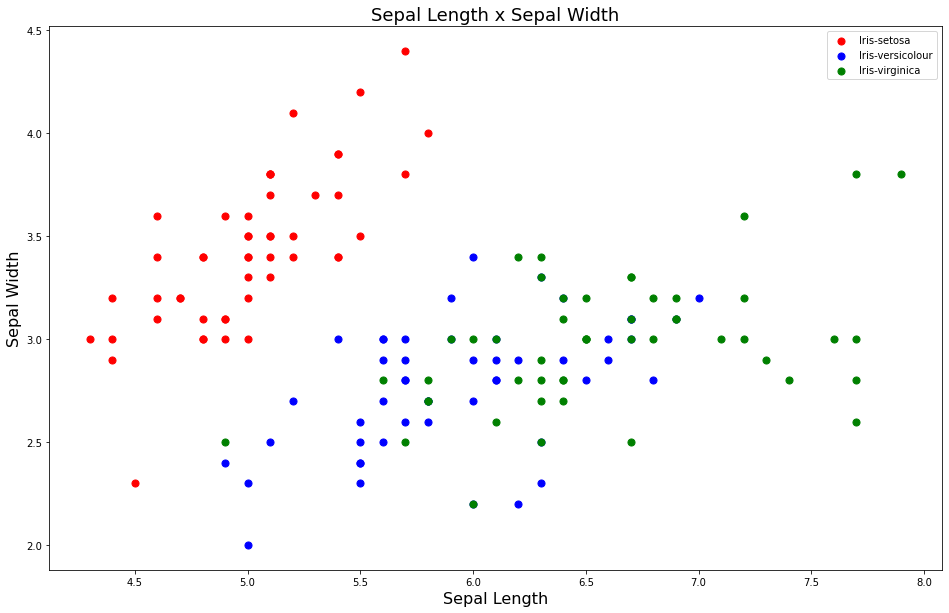

In [25]:
dataset_iris = datasets.load_iris()
X, y = dataset_iris['data'], dataset_iris['target']
plot_dataset(X, target=y)

Observando o gráfico de dispersão acima, podemos perceber a existência de 2 possíveis clusters: um cluster na parte superior esquerda e outro cluster na parte superior direita. Com base nisso, decidimos utilizar o KMeans com k = 2.

### 4.1.2 Resultados.

Inércia = 152.34795176035803


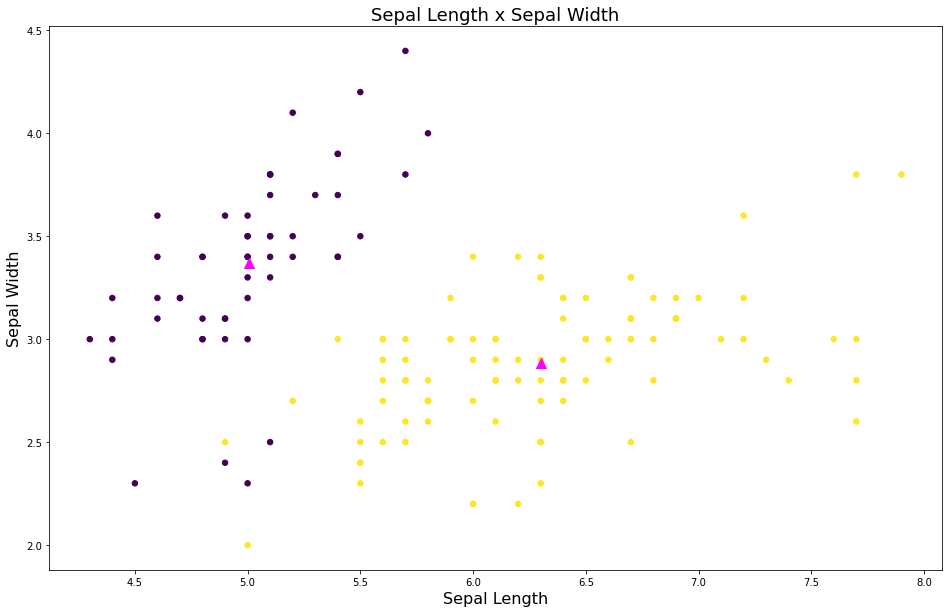

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print('Inércia =', kmeans.inertia_)

plot_dataset(X, kmeans, y, False)

Calculamos as métricas sugeridas.
- Homogeneidade significa que cada cluster contém apenas membros de uma mesma classe.
- Completude significa que todos os membros de uma classe estão no mesmo cluster.

In [27]:
y_pred = kmeans.predict(X)
homogeneity_1, completeness_1 = compute_metrics(y, y_pred)
print('Homogeneidade:', round(homogeneity_1, 2))
print('Completude: ', round(completeness_1, 2))

Homogeneidade: 0.52
Completude:  0.88


Observe o mesmo gráfico de dispersão acima, mas com os labels.

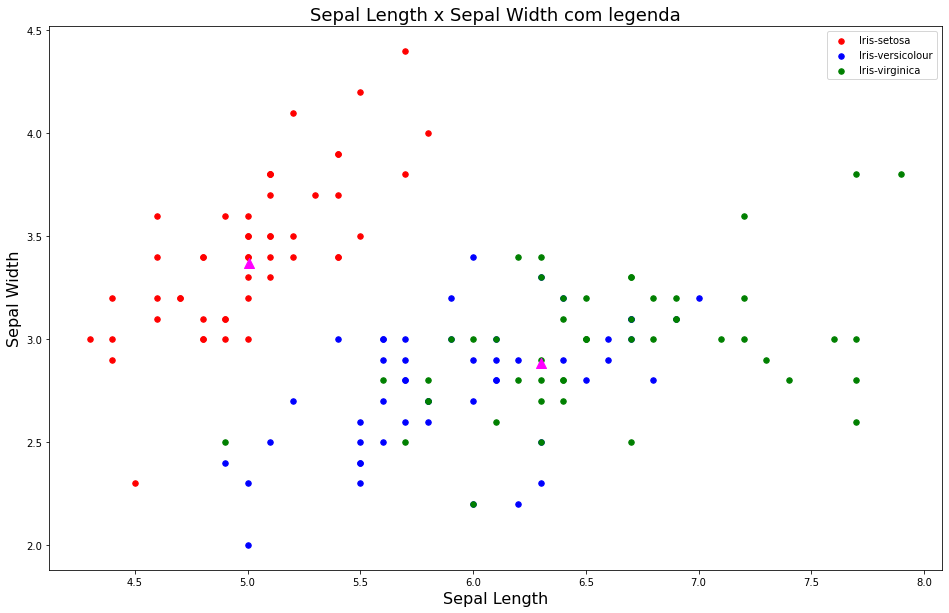

In [28]:
plot_dataset(X, kmeans, y, title='Sepal Length x Sepal Width com legenda')

Podemos ver que a completude não chegou em 1 porque existe um ponto vermelho (Classe Iris-setosa) no cluster inferior, sendo que todos os outros pontos estão no cluster superior. Já a homogeneidade está um pouco maior que 50% porque um cluster divide pontos pertencentes a duas classes. Para que a homogeneidade chegasse a 1, era necessário a existência de 3 clusters e que cada cluster possuisse apenas pontos de uma mesma classe.

## 4.2 Normalizar os dados.

Inércia = 0.5544050220763205


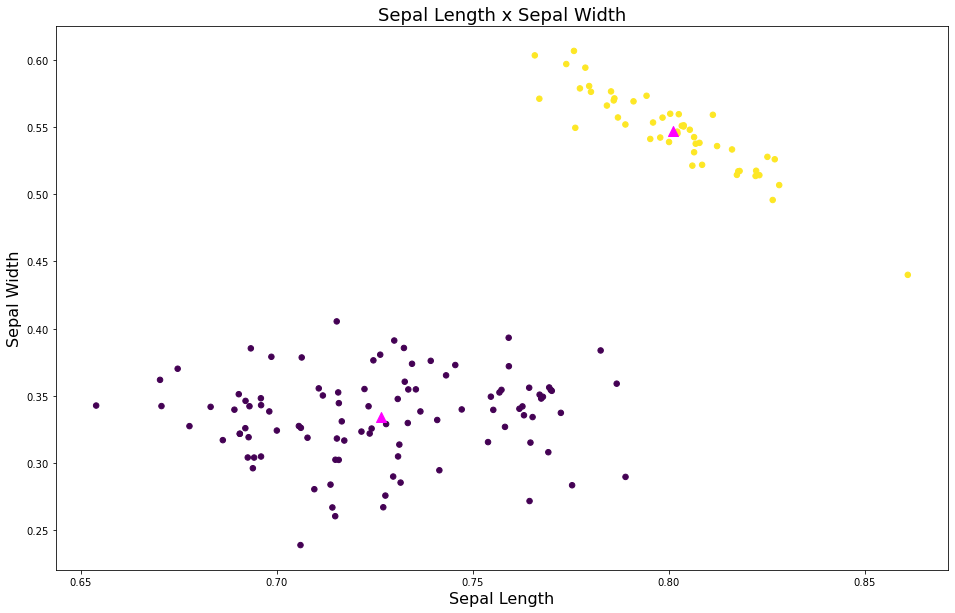

In [29]:
X_normalized = preprocessing.normalize(X, norm='l2')

kmeans_normalized = KMeans(n_clusters=2)
kmeans_normalized.fit(X_normalized)

print('Inércia =', kmeans_normalized.inertia_)

plot_dataset(X_normalized, kmeans_normalized, y, False)

Cálculo das variâncias de cada feature para os dados normais e para dos dados normalizados.

In [30]:
variances = [np.var(X[:,i]) for i in range(len(dataset_iris['feature_names']))]
normalized_variances = [np.var(X_normalized[:,i]) for i in range(len(dataset_iris['feature_names']))]
print('Variâncias:', variances)
print('Variâncias com os dados normalizados:', normalized_variances)

Variâncias: [0.6811222222222223, 0.1887128888888889, 3.0955026666666665, 0.5771328888888888]
Variâncias com os dados normalizados: [0.0019553595340242804, 0.011082002720743733, 0.02542499076917965, 0.006039850375842369]


Podemos ver que com os dados normalizados tivemos um valor de inércia menor que 1. Ou seja, obtivemos um melhor resultado. Analisando as variâncias acima podemos ver que quando os dados não estão normalizados, a feature 'petal_length' possui variância maior que 3, e como o KMeans utiliza a distância euclideana, essa feature terá uma maior importância no cálculo. Enquanto que com os dados normalizados todas as features terão a mesma importância.

In [31]:
y_pred_normalized = kmeans_normalized.predict(X_normalized)
homogeneity_2, completeness_2 = compute_metrics(y, y_pred_normalized)
print('Homogeneidade:', round(homogeneity_2, 2))
print('Completude: ', round(completeness_2, 2))

Homogeneidade: 0.58
Completude:  1.0


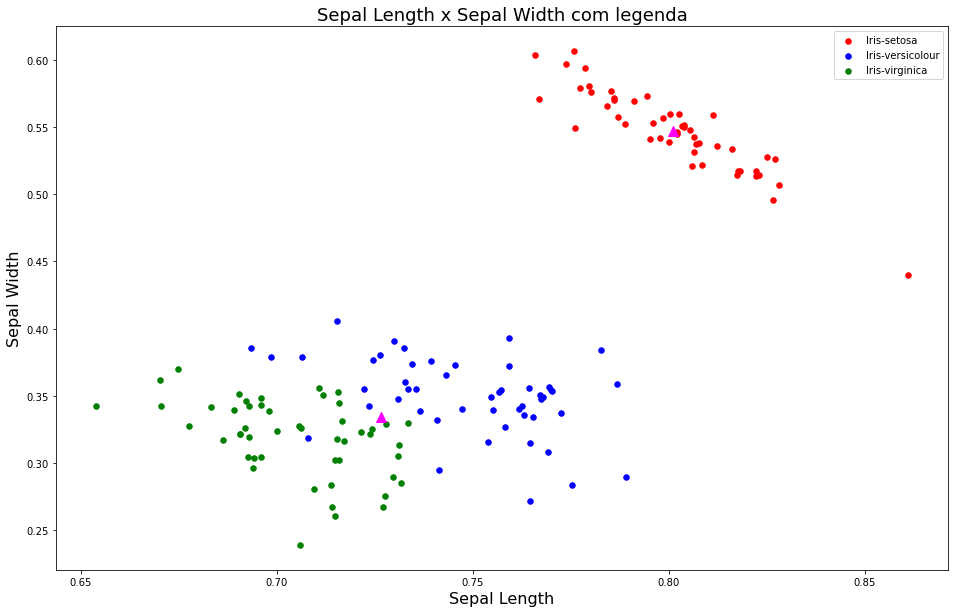

In [32]:
plot_dataset(X_normalized, kmeans_normalized, y, title='Sepal Length x Sepal Width com legenda')

Agora com a normalização todos, os pontos de uma classe pertencem ao mesmo cluster. A completude então é 100%, porém a homogeidade teve somente um pequeno acréscimo porque o fato de um cluster possuir pontos de duas classes distintas ainda persiste.

## 4.3 Método do cotovelo.

Inicialmente escolhemos o valor de k = 2 porque foi possível visualizar os dados de antemão e dois clusters pareceu uma escolha aceitável. Mas utilizamos o método do cotovelo para validar essa escolha e encontrar o melhor valor de k. Calculamos a inercia para uma faixa de valores de k de 1 a 10 e plotamos o resultado. Utilizamos esse método para os dados não normalizados e para os dados normalizados.

In [33]:
k_ = 10 # Número de k's para testar

### 4.3.1 Danos não normalizados.

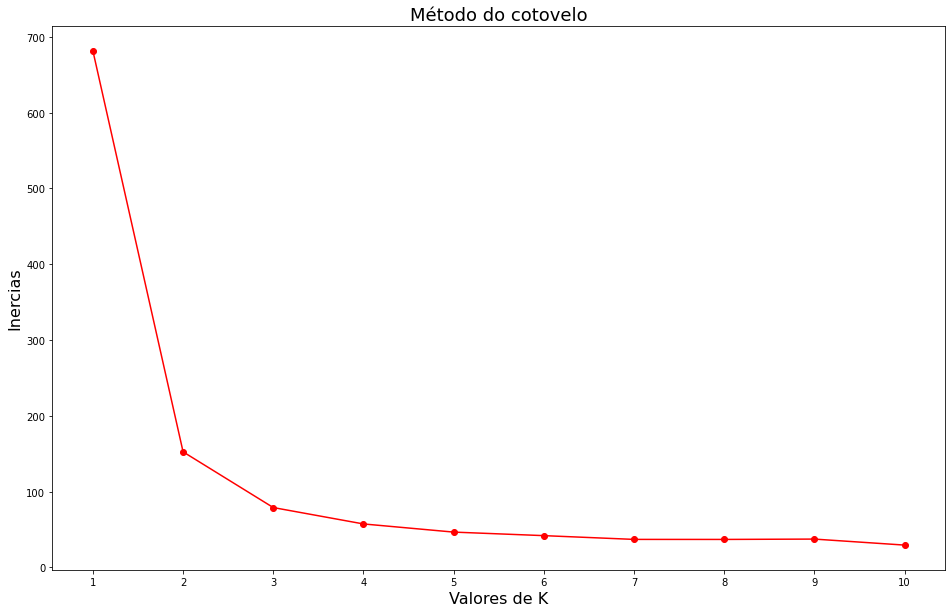

In [34]:
inertias = elbow_method(X, k_)
elbow_method_plot(inertias)

### 4.3.2 Dados normalizados.

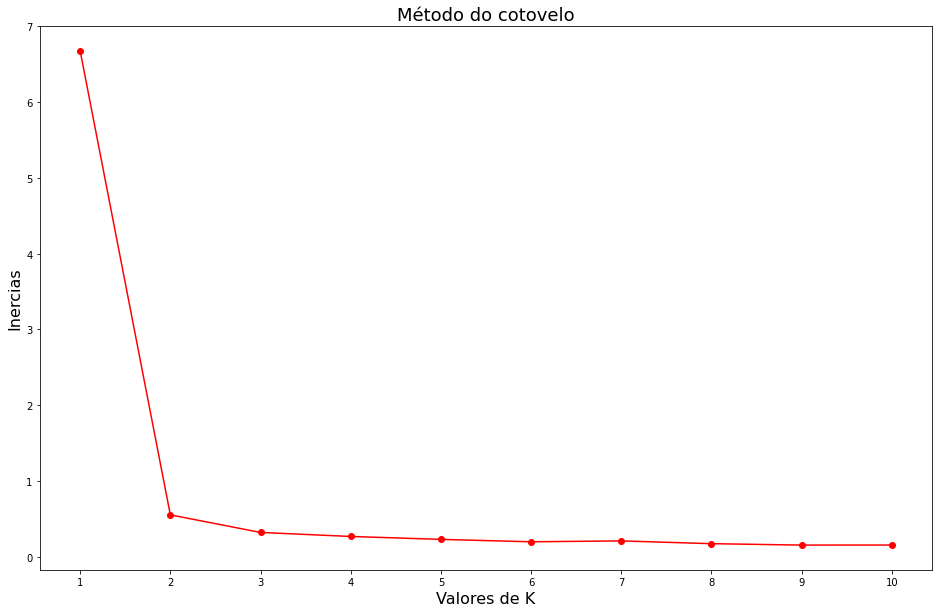

In [35]:
inertias = elbow_method(X_normalized, k_)
elbow_method_plot(inertias)

## 4.4 Analisar o resultado obtido pelo método do cotovelo.

Podemos ver que nos dois casos o método do cotovelo nos diz que o melhor valor para k é 2. Como inicialmente já havíamos escolhido k = 2 apenas com a análise do gráfico, o KMeans, as métricas e as análises já foram realizados da seção 4.1 a 4.3.

# Conclusão